# **Task 1: Prediction using Supervised ML**
# **Submitted by: Gunjan Vazirani**


## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [14]:
#downloading data and saving it as studentscores.csv
!wget -O  studentscores.csv https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
print('Data downloaded successfully')

--2020-11-21 06:00:09--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘studentscores.csv’

studentscores.csv   100%[===================>]     212  --.-KB/s    in 0s      

2020-11-21 06:00:09 (12.8 MB/s) - ‘studentscores.csv’ saved [212/212]

Data downloaded successfully


In [15]:
#importing few required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('studentscores.csv')
print('Data imported successfully')
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
#df.info() is used to check the basic details of the dataframe like number of entries, total columns, Dtype etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
df.shape

(25, 2)

# **Data Visualization**


Text(0, 0.5, 'Percentage scored')

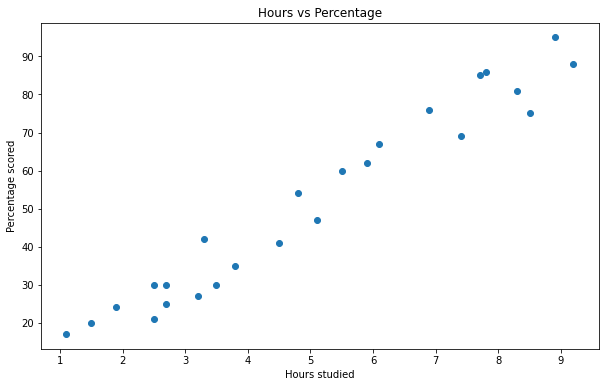

In [20]:
X=np.array(df['Hours']).reshape(-1,1)
y=np.array(df['Scores']).reshape(-1,1)
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 0)

# **Training the Algorithm**

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
regr=lr.fit(X_train, y_train)
print(regr.coef_,regr.intercept_)

[[9.91065648]] [2.01816004]


Text(0, 0.5, 'Percentage scored')

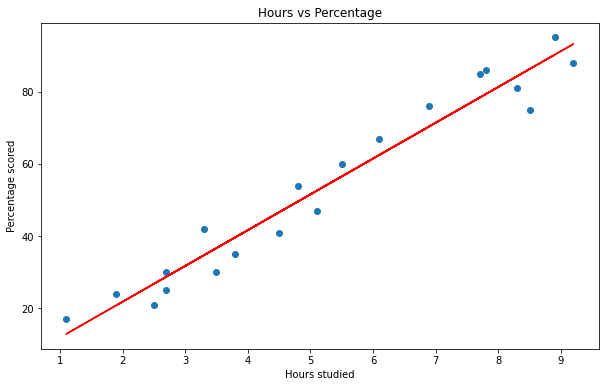

In [23]:
#plotting the train data
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train)
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')

# **Making prediction and comparing actual and predicted values.**


In [24]:
prediction=regr.predict(X_test)
y_test_tab=y_test.reshape(1,-1)
prediction_tab=prediction.reshape(1,-1)
diff=pd.DataFrame({'Actual':prediction_tab[0], 'predicted':y_test_tab[0]})
diff

,Actual,predicted
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


# **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [25]:
hours=9.25
pred=regr.predict([[hours],])
print('If a student studies for {} hours, he/she will score {}. '.format(hours,pred[0][0]))

If a student studies for 9.25 hours, he/she will score 93.69173248737539. 


# **Evaluating the model**
R-squared is a statistical measure that represents the goodness of fit of a 
regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.**

---



In [26]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(prediction , y_test) )

R2-score: 0.95
